In [6]:
from google.colab import files
uploaded = files.upload()


Saving Raigarh BF Data From 1st Jan 2025 .xlsx to Raigarh BF Data From 1st Jan 2025  (2).xlsx


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import warnings
warnings.filterwarnings("ignore", module="sklearn")

In [8]:
df = pd.read_excel("Raigarh BF Data From 1st Jan 2025 .xlsx")


In [9]:

bf1_columns = [
    'Date',
    'Production - BF1(MT)',
    'Coke rate- BF1(kg/thm)',
    'Nut Coke - BF1(Kg/thm)',
    'Total Coke Rate (Coke Rate+Nut Coke) BF1',
    'PCI rate- BF1(kg/thm)',
    'Fuel rate- BF1(kg/thm)',
    'Slag Rate - BF1(Kg/thm)',
    'O2 Enrichment - BF1(%)',
    'ETA CO Levels- BF1(%)',
    'Sinter Consumption- BF1(%)'
]
df = df[bf1_columns]


In [10]:

print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 Date                                        0
Production - BF1(MT)                        0
Coke rate- BF1(kg/thm)                      0
Nut Coke - BF1(Kg/thm)                      0
Total Coke Rate (Coke Rate+Nut Coke) BF1    0
PCI rate- BF1(kg/thm)                       0
Fuel rate- BF1(kg/thm)                      0
Slag Rate - BF1(Kg/thm)                     0
O2 Enrichment - BF1(%)                      0
ETA CO Levels- BF1(%)                       0
Sinter Consumption- BF1(%)                  0
dtype: int64


In [11]:

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [12]:

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.replace('%', '').str.replace(',', '')
        df[col] = pd.to_numeric(df[col], errors='coerce')

print("\nData Types & Non-Null Info:")
df.info()
print("\nSummary Statistics:")
print(df.describe())



Data Types & Non-Null Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 11 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Date                                      205 non-null    datetime64[ns]
 1   Production - BF1(MT)                      205 non-null    int64         
 2   Coke rate- BF1(kg/thm)                    205 non-null    float64       
 3   Nut Coke - BF1(Kg/thm)                    205 non-null    float64       
 4   Total Coke Rate (Coke Rate+Nut Coke) BF1  205 non-null    float64       
 5   PCI rate- BF1(kg/thm)                     205 non-null    float64       
 6   Fuel rate- BF1(kg/thm)                    205 non-null    float64       
 7   Slag Rate - BF1(Kg/thm)                   205 non-null    float64       
 8   O2 Enrichment - BF1(%)                    205 non-null    float64       
 9   ETA

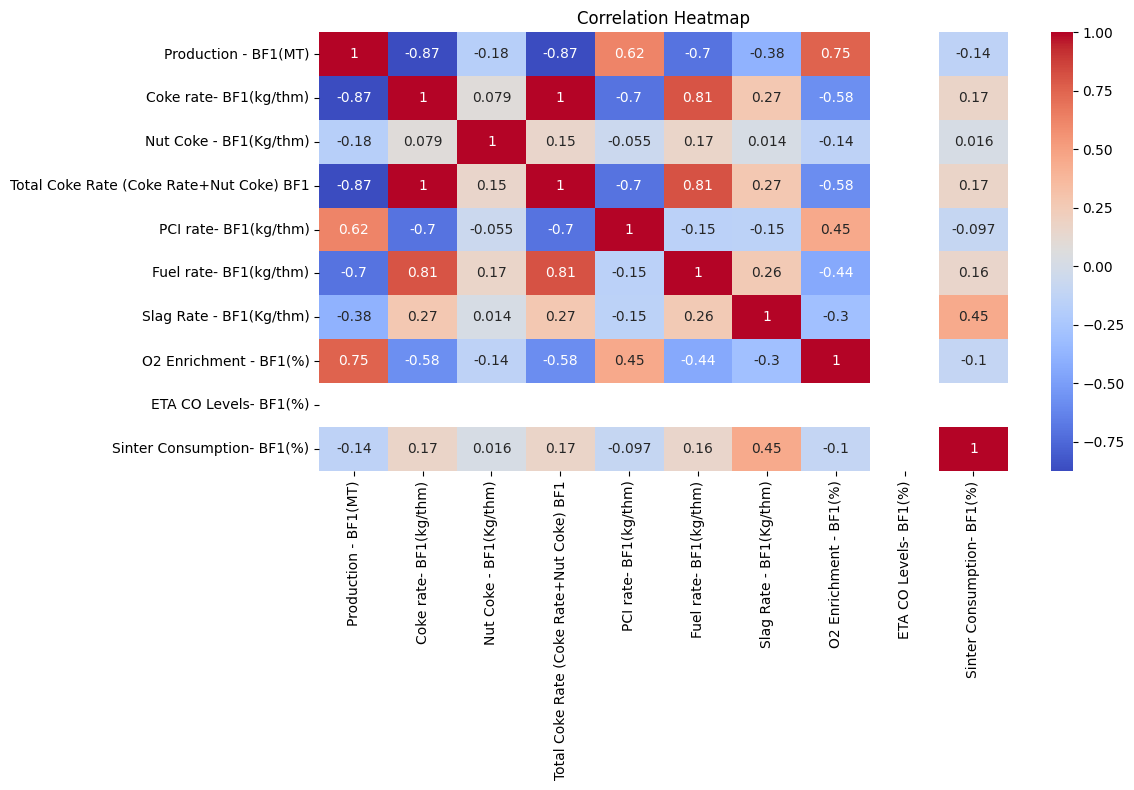

In [13]:

plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


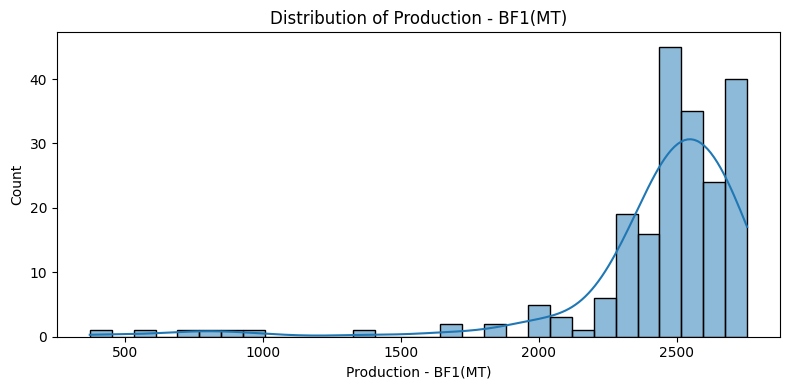

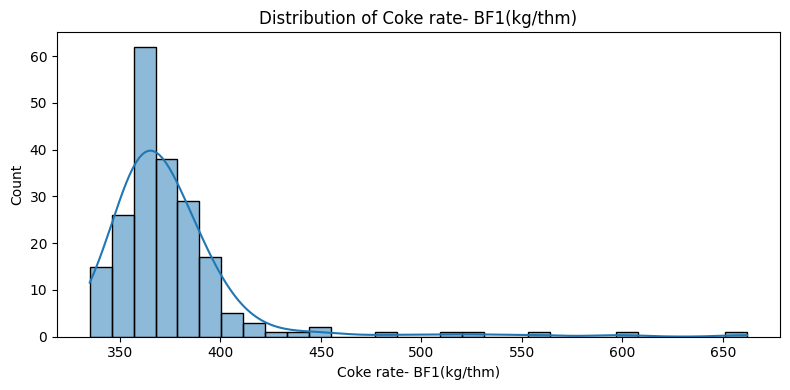

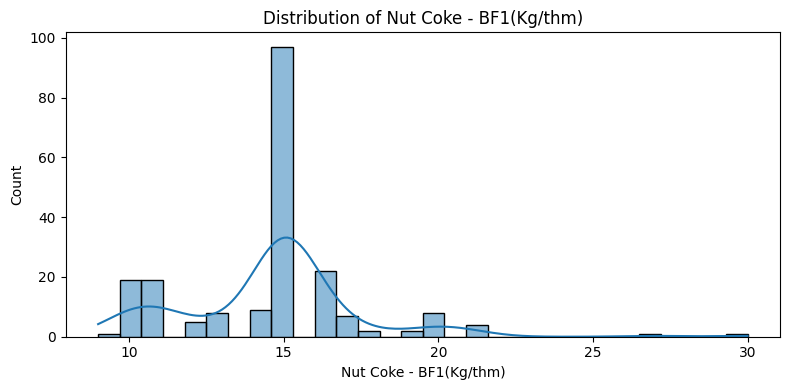

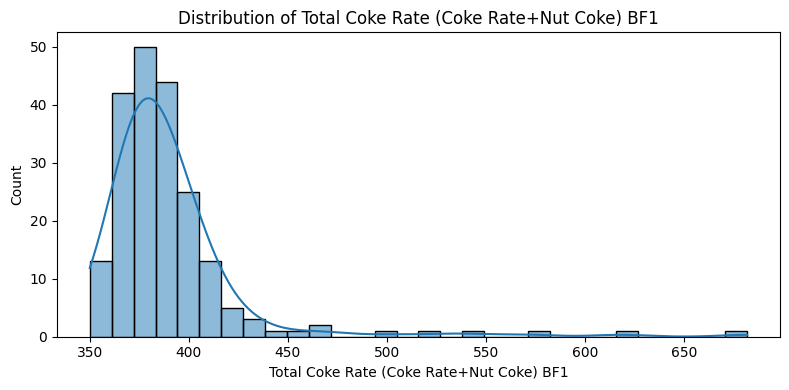

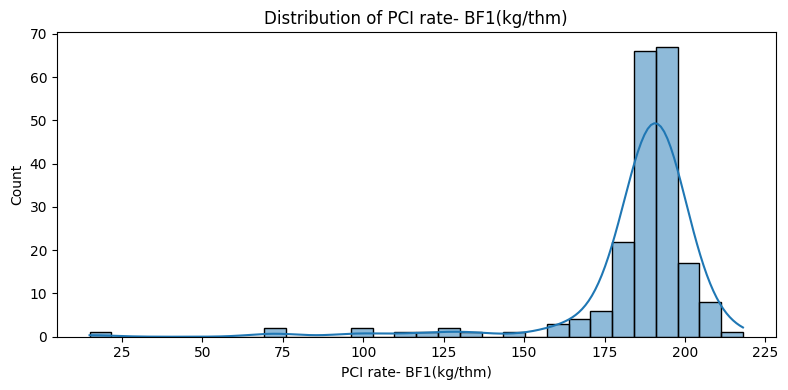

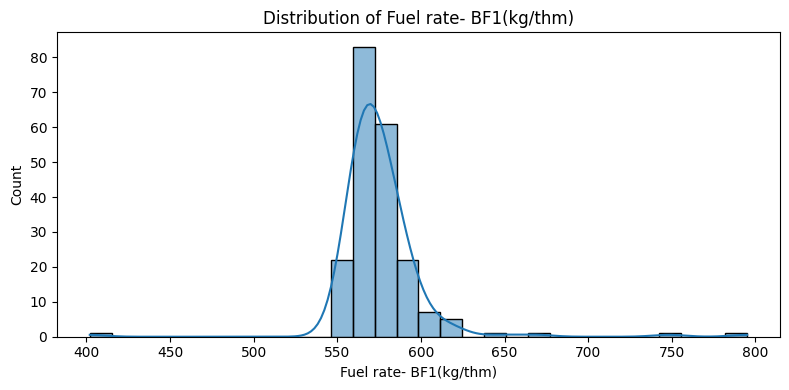

In [14]:

numeric_cols = df.select_dtypes(include='number').columns[:6]

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()


In [15]:

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.replace('%', '').str.replace(',', '')
        df[col] = pd.to_numeric(df[col], errors='coerce')

numeric_df = df.select_dtypes(include='number')
numeric_df = numeric_df.dropna(axis=1, how='all')
numeric_df = numeric_df.fillna(numeric_df.mean())
df_clean = pd.concat([df[['Date']], numeric_df], axis=1)
assert df_clean.drop(columns='Date').isnull().sum().sum() == 0, "Data still contains NaNs."

In [16]:

X_prod = df_clean.drop(columns=['Production - BF1(MT)', 'Date'])
y_prod = df_clean['Production - BF1(MT)']

X_fuel = df_clean.drop(columns=['Fuel rate- BF1(kg/thm)', 'Date'])
y_fuel = df_clean['Fuel rate- BF1(kg/thm)']


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [18]:


X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_prod, y_prod, test_size=0.2, random_state=42)
scaler_p = StandardScaler()
X_train_p_scaled = scaler_p.fit_transform(X_train_p)
X_test_p_scaled = scaler_p.transform(X_test_p)

X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_fuel, y_fuel, test_size=0.2, random_state=42)
scaler_f = StandardScaler()
X_train_f_scaled = scaler_f.fit_transform(X_train_f)
X_test_f_scaled = scaler_f.transform(X_test_f)


In [19]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [20]:
# STEP 6: Evaluation Function
def evaluate_model(name, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"\n--- {name} ---")
    print(f"R² Score: {r2:.4f}")
    print(f"MAE     : {mae:.4f}")
    print(f"RMSE    : {rmse:.4f}")

In [21]:

lr_prod = LinearRegression()
lr_prod.fit(X_train_p_scaled, y_train_p)
y_pred_lr_p = lr_prod.predict(X_test_p_scaled)
evaluate_model("Linear Regression - Throughput", y_test_p, y_pred_lr_p)


lr_fuel = LinearRegression()
lr_fuel.fit(X_train_f_scaled, y_train_f)
y_pred_lr_f = lr_fuel.predict(X_test_f_scaled)
evaluate_model("Linear Regression - Fuel Rate", y_test_f, y_pred_lr_f)



--- Linear Regression - Throughput ---
R² Score: 0.9221
MAE     : 89.0713
RMSE    : 127.1457

--- Linear Regression - Fuel Rate ---
R² Score: 1.0000
MAE     : 0.0000
RMSE    : 0.0000


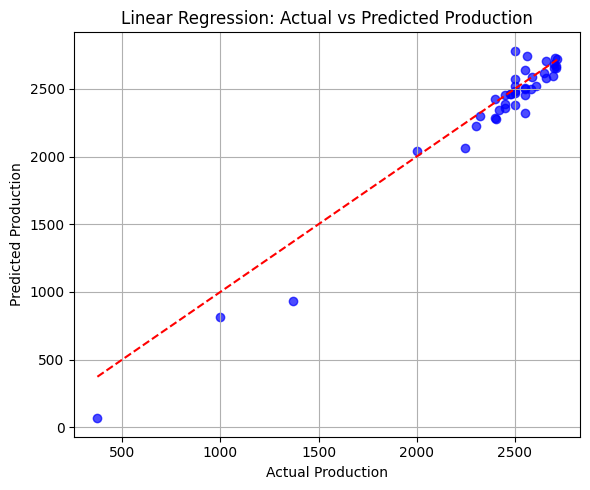

In [22]:

plt.figure(figsize=(6, 5))
plt.scatter(y_test_p, y_pred_lr_p, alpha=0.7, color='blue')
plt.plot([y_test_p.min(), y_test_p.max()], [y_test_p.min(), y_test_p.max()], 'r--')
plt.xlabel("Actual Production")
plt.ylabel("Predicted Production")
plt.title("Linear Regression: Actual vs Predicted Production")
plt.grid(True)
plt.tight_layout()
plt.show()


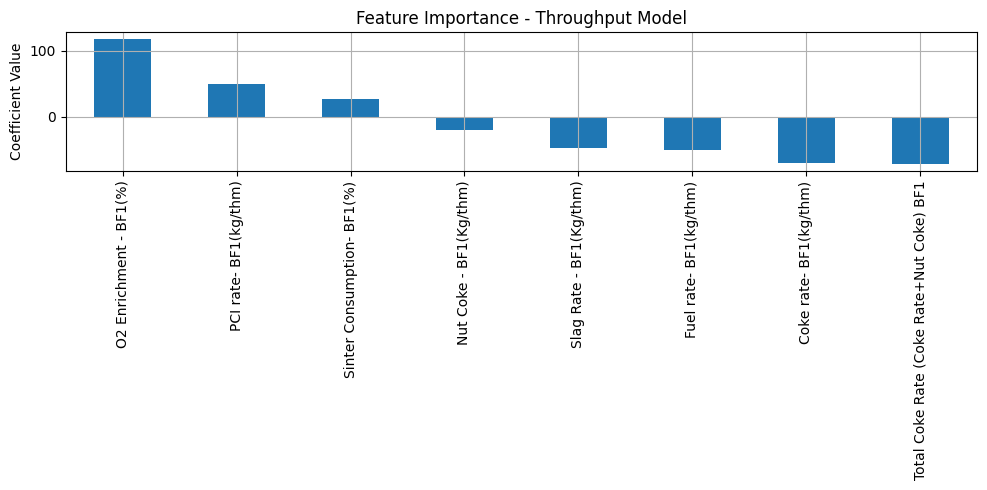

In [23]:

coefficients = pd.Series(lr_prod.coef_, index=X_train_p.columns)
coefficients.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), title="Feature Importance - Throughput Model")
plt.ylabel("Coefficient Value")
plt.grid(True)
plt.tight_layout()
plt.show()

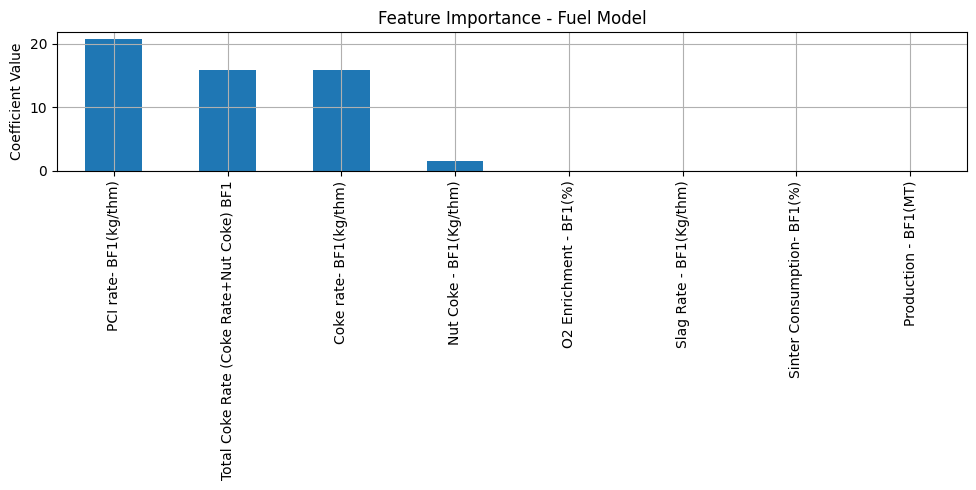

In [24]:

coefficients_fuel = pd.Series(lr_fuel.coef_, index=X_train_f.columns)
coefficients_fuel.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), title="Feature Importance - Fuel Model")
plt.ylabel("Coefficient Value")
plt.grid(True)
plt.tight_layout()
plt.show()


In [25]:
from sklearn.ensemble import RandomForestRegressor


rf_prod = RandomForestRegressor(random_state=42)
rf_prod.fit(X_train_p_scaled, y_train_p)
y_pred_rf_p = rf_prod.predict(X_test_p_scaled)
evaluate_model("Random Forest - Throughput", y_test_p, y_pred_rf_p)

rf_fuel = RandomForestRegressor(random_state=42)
rf_fuel.fit(X_train_f_scaled, y_train_f)
y_pred_rf_f = rf_fuel.predict(X_test_f_scaled)
evaluate_model("Random Forest - Fuel Rate", y_test_f, y_pred_rf_f)



--- Random Forest - Throughput ---
R² Score: 0.9358
MAE     : 73.9034
RMSE    : 115.4403

--- Random Forest - Fuel Rate ---
R² Score: 0.8160
MAE     : 5.3987
RMSE    : 15.5873


In [26]:
results = pd.DataFrame({
    "Model": ["Linear - Prod", "Random Forest - Prod", "Linear - Fuel", "Random Forest - Fuel"],
    "R² Score": [
        r2_score(y_test_p, y_pred_lr_p),
        r2_score(y_test_p, y_pred_rf_p),
        r2_score(y_test_f, y_pred_lr_f),
        r2_score(y_test_f, y_pred_rf_f)
    ],
    "MAE": [
        mean_absolute_error(y_test_p, y_pred_lr_p),
        mean_absolute_error(y_test_p, y_pred_rf_p),
        mean_absolute_error(y_test_f, y_pred_lr_f),
        mean_absolute_error(y_test_f, y_pred_rf_f)
    ]
})

print(results)


                  Model  R² Score           MAE
0         Linear - Prod  0.922102  8.907131e+01
1  Random Forest - Prod  0.935785  7.390341e+01
2         Linear - Fuel  1.000000  1.109140e-14
3  Random Forest - Fuel  0.815981  5.398727e+00


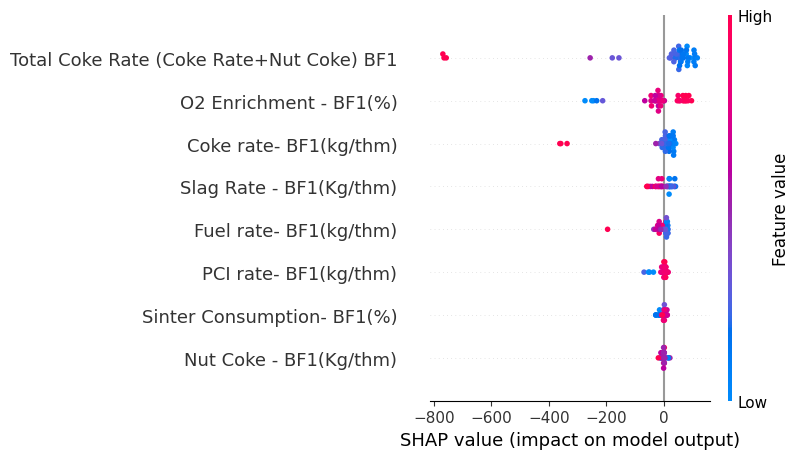

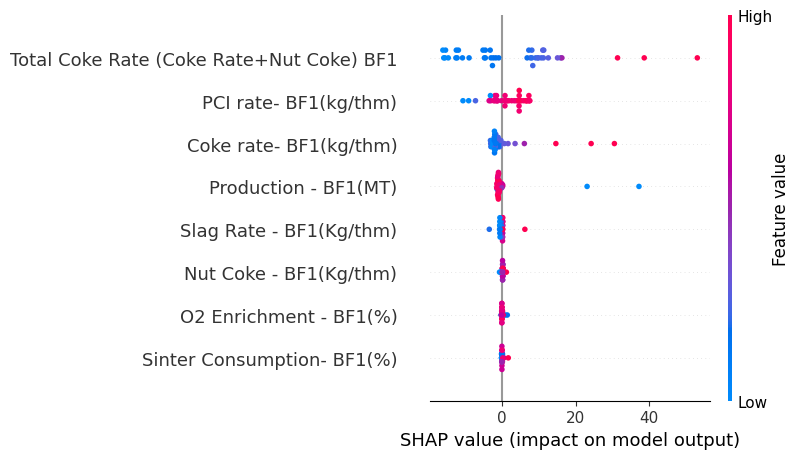

In [27]:
import shap


explainer_prod = shap.TreeExplainer(rf_prod)
shap_values_prod = explainer_prod.shap_values(X_test_p_scaled)
shap.summary_plot(shap_values_prod, X_test_p, feature_names=X_train_p.columns)

explainer_fuel = shap.TreeExplainer(rf_fuel)
shap_values_fuel = explainer_fuel.shap_values(X_test_f_scaled)
shap.summary_plot(shap_values_fuel, X_test_f, feature_names=X_train_f.columns)


In [28]:
def simulate_change(model, scaler, X_sample, changes):
    X_new = X_sample.copy()
    for col, val in changes.items():
        X_new[col] += val
    X_new_scaled = scaler.transform(X_new)
    return model.predict(X_new_scaled)

sample_row = X_test_p.sample(1).copy()
predicted = simulate_change(rf_prod, scaler_p, sample_row, {"O2 Enrichment - BF1(%)": 2})
print("Predicted Throughput after change:", predicted)


Predicted Throughput after change: [2671.05]


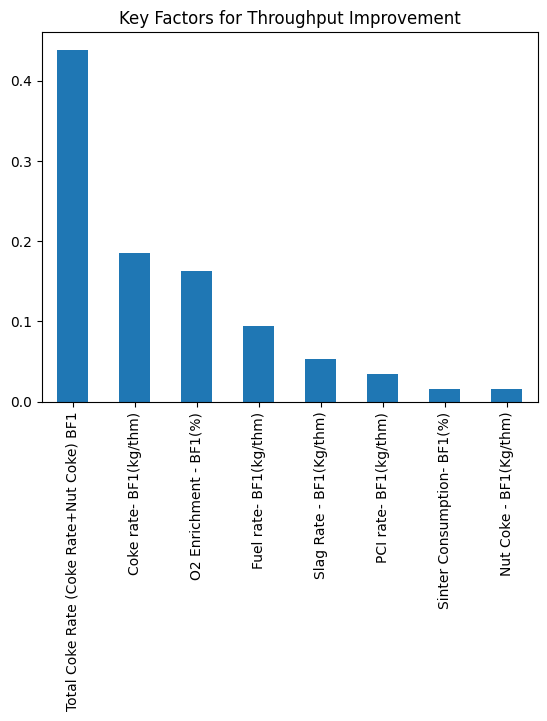

In [29]:
top_features_prod = pd.Series(rf_prod.feature_importances_, index=X_train_p.columns).sort_values(ascending=False)
top_features_prod.plot(kind='bar', title="Key Factors for Throughput Improvement")
plt.show()


In [30]:

import itertools

top_features = coefficients.abs().sort_values(ascending=False).head(3).index
print("Top features for throughput:", top_features.tolist())


param_changes = [-5, 0, 5, 10]
scenarios = []

for changes in itertools.product(param_changes, repeat=len(top_features)):
    scenario = X_train_p.mean().copy()
    for feat, change in zip(top_features, changes):
        scenario[feat] *= (1 + change / 100)
    pred_throughput = rf_prod.predict([scaler_p.transform([scenario])[0]])[0]
    scenarios.append((changes, pred_throughput))

scenarios.sort(key=lambda x: x[1], reverse=True)
print("Top scenarios for higher throughput:", scenarios[:5])

Top features for throughput: ['O2 Enrichment - BF1(%)', 'Total Coke Rate (Coke Rate+Nut Coke) BF1', 'Coke rate- BF1(kg/thm)']
Top scenarios for higher throughput: [((10, -5, -5), np.float64(2643.02)), ((10, -5, 0), np.float64(2581.7)), ((10, -5, 5), np.float64(2541.28)), ((10, -5, 10), np.float64(2534.83)), ((10, 0, -5), np.float64(2515.65))]


In [31]:
import joblib

# Example: Save models & scalers
joblib.dump(rf_prod, "rf_prod_model.joblib")
joblib.dump(rf_fuel, "rf_fuel_model.joblib")
joblib.dump(scaler_p, "scaler_prod.joblib")
joblib.dump(scaler_f, "scaler_fuel.joblib")


['scaler_fuel.joblib']